# <center style='color:seagreen'>`Linear Discriminant Analysis (LDA)` using Scikit-Learn</center>

# 1. Import required libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

# 2. Load `raisin` dataset

In [2]:
df = pd.read_excel('raisin.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
df.shape

(900, 8)

In [4]:
df.Class.unique()

array(['Kecimen', 'Besni'], dtype=object)

In [5]:
df.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

# 3. Perform preprocessing

In [6]:
df.Class = df.Class.apply(lambda x: 0 if x == 'Kecimen' else 1)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [7]:
df.Class.unique()

array([0, 1])

In [8]:
df.Class.value_counts()

0    450
1    450
Name: Class, dtype: int64

# 4. Separate features and classes

In [9]:
X = df.iloc[:, :-1]
y = df.loc[:, 'Class']

# 5. Split the dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(720, 180, 720, 180)

# 6. Apply `Linear Discriminant Analysis`

In [12]:
lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')

In [13]:
print('Accuracy on the train set:', round(lda.score(X_train, y_train), 4))
print('Accuracy on the test set:', round(lda.score(X_test, y_test), 4))

Accuracy on the train set: 0.8667
Accuracy on the test set: 0.8611


# 7. Plot `confusion_matrix`

In [14]:
y_pred = lda.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=lda.classes_)

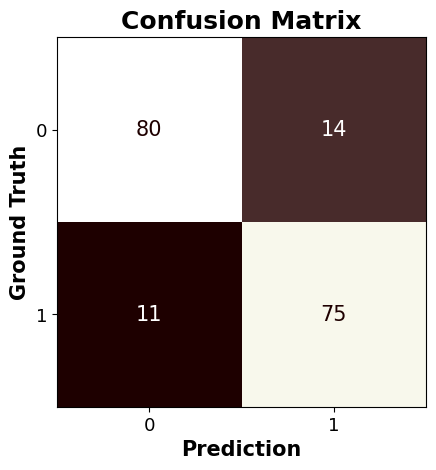

In [15]:
disp.plot(cmap='pink', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [16]:
y_test.value_counts()

0    94
1    86
Name: Class, dtype: int64

In [17]:
cat_labels = ['Kecimen', 'Besni']
y_pred = lda.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)

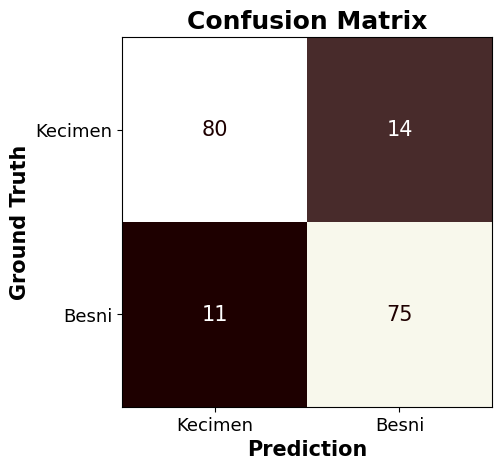

In [18]:
disp.plot(cmap='pink', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [19]:
print('F1 score:', round(metrics.f1_score(y_test, y_pred), 4))
print('ROC-AUC score:', round(metrics.roc_auc_score(y_test, lda.predict_proba(X_test)[:, 1]), 4))

F1 score: 0.8571
ROC-AUC score: 0.926


# 8. Print `classification_report`

In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        94
           1       0.84      0.87      0.86        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180

